17. Generación de números aleatorios uniformes.

(a) Escriba un programa para generar números aleatorios en el rango [0, 1] usando el método de congruencia lineal.
Intente utilizando la siguiente elección de parámetros (a, c, M, x1 )=(57, 1, 256, 10). Determine el perı́odo, esto es, cuántos números son generados antes de que la sequencia se repita. Tome la secuencia de números generada y busque correlaciones, observando pares de números sucesivos (no los conecte con lı́neas). ¿Puede esta secuencia usarse para un trabajo serio?. Testee el método con constantes razonables como las estudiadas. Evalue el momento de orden k (k=1, 3 y 7) de la distribución de (N=10, 100 y 1000) números obtenida, y compare con k+1.

(b) Compute un número random ∆x en el rango [(− 2)^0.5, 2^0.5] y otro ∆y en el mismo rango y realize varias (K=10)
caminatas aleatorias de N = 1000 pasos, comenzando en el origen del plano (cada una con diferentes semillas). Calcule el valor de expectación de la distancia al origen R como función del paso N (y de N^0.5 ).

In [47]:
import matplotlib.pyplot as plt
import math
import random

Inciso a

In [48]:
def rng (a=57, c=1, m=256):           #Generamos los números pseudoaleatorios, siguiendo la sintaxis 
    rng.current=(a*rng.current+c)%m   #marcada en el Colab Astrostatistics-C04.ipynb, en la sección 
                                      #Pseudo random number generator
    return rng.current/m
rng.current=1

En la siguiente celda cremos una lista con 300 numeros pseudoaleatorios, luego de distintas pruebas se pudo determinar que al elegir un numero mayor a 256 (el valor de m) estaba garantizada la repeticion de los primeros numeros de la lista, y de esa manera poder determinar el período con que se repiten los núemeros así generados.

In [49]:
testlist=[rng() for i in range(300)] 
#print(str(testlist))


In [50]:
prueba=testlist[0] #Para ver a partir de que valor se empiezan a repetir los numeros asignamos el primer valor a la variable prueba
i=1 #Iniciamos una variable de control, para recorrer la lista
igual=False #Seteamos una variable logica en false, para comparar los valores de los mismbros de la lista con el primero.
while prueba!=testlist[i]: #Recorremos la lista corroborando que cada elemento sea distinto que prueba
    i=i+1 #pasamos al siguiente elemento
print( i) #nos dice en que elemento de la lista se repitió el valor, dandonos de este modo el período de generación de números

256


In [51]:
i=0
pares=[[testlist[i],testlist[i+1]] for i in range(len(testlist)-1)]
#print("Los elementos consecutivos de a pares son : " + str(pares))
    

In [52]:
import numpy as np
a = np.array(pares)
x=a[:,0]             #Aquí converimos la lista de elementos en vectores para poder plotearlos.
y=a[:,1]

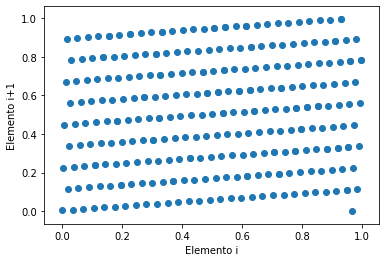

In [53]:
plt.scatter(x,y)                #En el plot podemos ver que existe una tendencia, y por lo tanto 
plt.xlabel("Elemento i")        #los números generados no son buenos para trabajar en general, pues no cumplen
plt.ylabel("Elemento i+1");     #la condición de aleatoriedad.

En la siguiente celda se procede a calcular los momentos k pedidos en el inciso, y a compararlos con 1/(k+1) 

In [54]:
k_1=sum(testlist)/10 #El momento k=1 es fácil de calcular
k_2=0
k_3=0
for i in range(len(testlist)): #Para los momentos k=3 y k=7 se tuvo que calcular primero la suma de cada elemento
    k_2=k_2+testlist[i]**3     #y luego dividirlo por N 
    k_3=k_3+testlist[i]**7
k_2=k_2/10
k_3=k_3/10
r_1=1/(k_1+1)     #Comparacion con 1/(k-1), podemos ver que para N=10 son súmamente distintas, pero si N crece
r_2=1/(k_2+1)     #los valores se van acercando. Esto lo podemos ver en las celdas siguientes.
r_3=1/(k_3+1)
print("Los momentos 1, 3 y 7 para N=10 son: ", k_1 ,", ", k_2, ", y ", k_3," respectivamente.")
print("Los momentos 1, 3 y 7 para N=10 comparados con 1/(k+1) son: ", r_1-k_1 ,", ", r_2-k_2, ", y ", r_3-k_3," respectivamente.");

Los momentos 1, 3 y 7 para N=10 son:  15.24140625 ,  7.659629917144775 , y  3.843486806160288  respectivamente.
Los momentos 1, 3 y 7 para N=10 comparados con 1/(k+1) son:  -15.179835226862764 ,  -7.544151541097763 , y  -3.6370239747289874  respectivamente.


In [55]:
k_1=sum(testlist)/100
k_2=0
k_3=0
for i in range(len(testlist)):
    k_2=k_2+testlist[i]**3
    k_3=k_3+testlist[i]**7
k_2=k_2/100
k_3=k_3/100
r_1=1/(k_1+1)
r_2=1/(k_2+1)
r_3=1/(k_3+1)
print("Los momentos 1, 3 y 7 para N=100 son: ", k_1 ,", ", k_2, ", y ", k_3," respectivamente.")
print("Los momentos 1, 3 y 7 para N=10 comparados con 1/(k+1) son: ", r_1-k_1 ,", ", r_2-k_2, ", y ", r_3-k_3," respectivamente.");

Los momentos 1, 3 y 7 para N=100 son:  1.524140625 ,  0.7659629917144776 , y  0.3843486806160288  respectivamente.
Los momentos 1, 3 y 7 para N=10 comparados con 1/(k+1) son:  -1.1279661844416418 ,  -0.1996997094759555 , y  0.33801268253057715  respectivamente.


In [56]:
k_1=sum(testlist)/1000
k_2=0
k_3=0
for i in range(len(testlist)):
    k_2=k_2+testlist[i]**3
    k_3=k_3+testlist[i]**7
k_2=k_2/1000
k_3=k_3/1000
r_1=1/(k_1+1)
r_2=1/(k_2+1)
r_3=1/(k_3+1)
print("Los momentos 1, 3 y 7 para N=1000 son: ", k_1 ,", ", k_2, ", y ", k_3," respectivamente.")
print("Los momentos 1, 3 y 7 para N=10 comparados con 1/(k+1) son: ", r_1-k_1 ,", ", r_2-k_2, ", y ", r_3-k_3," respectivamente.");

Los momentos 1, 3 y 7 para N=1000 son:  0.1524140625 ,  0.07659629917144775 , y  0.03843486806160288  respectivamente.
Los momentos 1, 3 y 7 para N=10 comparados con 1/(k+1) son:  0.7153296005985227 ,  0.8522569773720473 , y  0.9245528269362091  respectivamente.


Punto b

In [57]:
def salto():        #Se computan los valores aleatorios en el rango solictado
    deltax=-2**0.5+random.random()*2*2**0.5
    deltay=-2**0.5+random.random()*2*2**0.5
    return(deltax,deltay)

In [58]:
def caminata():      #La funcion caminata me devuelve las posiciones de una caminata aleatoria de 1000 pasos, inciada en el origen (0,0)
    posicion_x=[0]
    posicion_y=[0]
    dist=[0]        #Tambien me devuelve una lista de las distancias alcanzadas en cada paso.
    for i in range(1000):
        x,y=salto()
        posicion_x.append(posicion_x[-1]+x)
        posicion_y.append(posicion_y[-1]+y)
        dist.append(((posicion_x[-1])**2+(posicion_y[-1])**2)**0.5)
        
    return(posicion_x,posicion_y,dist)
#print(caminata())

In [59]:
listac=[]  #caminata de 10 sujetos, me devuelve una lista de 10 listas de dos lista de 1000 objetos cada lista
for i in range(10):
    ci=caminata()
    listac.append(ci)



In [60]:
len(listac)

10

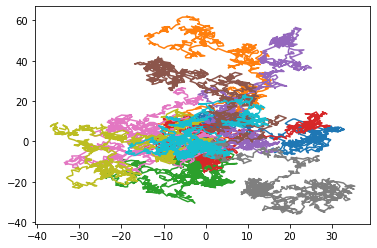

In [61]:
for caminata in listac:
    plt.plot(caminata[0], caminata[1])
plt.show()